In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Read data from CSV file
data = pd.read_csv("ML_gdp.csv")

# Extend the DataFrame to include year 2023
data_extended = data.copy()
data_extended.loc[len(data_extended)] = 2023

# Iterate over each column (excluding 'Year')
for column in data.columns[1:]:
    X = data[['Year']].values
    y = data[column].values
    
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict values for the year 2023
    X_2023 = np.array([[2023]])
    y_pred_2023 = model.predict(X_2023)
    
    # Print the predicted value for the current column in 2023
    print(f"Predicted {column} for 2023: {y_pred_2023[0]}")


Predicted Agricultue,Forestry&Fishing for 2023: 10.087272727272733
Predicted Minning&Quarring for 2023: 28.016363636363167
Predicted Manufacturing for 2023: 9.219999999999999
Predicted Construction for 2023: 16.085454545454922


In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Read data from CSV file
data = pd.read_csv("ML_gdp.csv")

# Use all data except for the last row (2022) for training
data_train = data.head(len(data)-1)

# Iterate over each column (excluding 'Year')
for column in data_train.columns[1:]:
    X_train = data_train[['Year']].values
    y_train = data_train[column].values
    
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict values for the year 2023
    X_2023 = np.array([[2023]])
    y_pred_2023 = model.predict(X_2023)
    
    # Print the predicted value for the current column in 2023
    print(f"Predicted {column} for 2023: {y_pred_2023[0]}")


Predicted Agricultue,Forestry&Fishing for 2023: 9.064242424242423
Predicted Minning&Quarring for 2023: 22.428484848484914
Predicted Manufacturing for 2023: 10.458787878787888
Predicted Construction for 2023: 15.205454545454586


In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Read data from CSV file
data = pd.read_csv("ML_gdp.csv")

# Select data from 2012 to 2030 for training
data_train = data.loc[(data['Year'] >= 2012) & (data['Year'] <= 2030)]

# Dictionary to store predicted values for each column
predicted_values = {}

# Iterate over each column (excluding 'Year')
for column in data_train.columns[1:]:
    X_train = data_train[['Year']].values
    y_train = data_train[column].values
    
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict values for the years 2023 to 2030
    X_future = np.array([[year] for year in range(2023, 2031)])
    y_pred_future = model.predict(X_future)
    
    # Store the predicted values in the dictionary
    predicted_values[column] = y_pred_future

# Print the predicted values for each column
for column, values in predicted_values.items():
    print(f"Predicted values for {column}:")
    for year, value in zip(range(2023, 2031), values):
        print(f"Year {year}: {value}")
    print()


Predicted values for Agricultue,Forestry&Fishing:
Year 2023: 10.087272727272733
Year 2024: 9.99272727272728
Year 2025: 9.898181818181826
Year 2026: 9.803636363636372
Year 2027: 9.709090909090918
Year 2028: 9.614545454545464
Year 2029: 9.52000000000001
Year 2030: 9.425454545454556

Predicted values for Minning&Quarring:
Year 2023: 28.016363636363167
Year 2024: 30.609999999999673
Year 2025: 33.20363636363618
Year 2026: 35.797272727271775
Year 2027: 38.39090909090828
Year 2028: 40.98454545454479
Year 2029: 43.57818181818129
Year 2030: 46.1718181818178

Predicted values for Manufacturing:
Year 2023: 9.219999999999999
Year 2024: 9.117272727272734
Year 2025: 9.01454545454547
Year 2026: 8.911818181818177
Year 2027: 8.809090909090912
Year 2028: 8.706363636363648
Year 2029: 8.603636363636383
Year 2030: 8.50090909090909

Predicted values for Construction:
Year 2023: 16.085454545454922
Year 2024: 17.12090909090921
Year 2025: 18.15636363636395
Year 2026: 19.191818181818235
Year 2027: 20.2272727272

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dictionary to store performance metrics for each column
performance_metrics = {}

# Iterate over each column (excluding 'Year')
for column in data_train.columns[1:]:
    X_train = data_train[['Year']].values
    y_train = data_train[column].values
    
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict values for the year 2023
    X_2023 = np.array([[2023]])
    y_pred_2023 = model.predict(X_2023)
    
    # Calculate performance metrics
    mae = mean_absolute_error([data.iloc[-1][column]], y_pred_2023)
    mse = mean_squared_error([data.iloc[-1][column]], y_pred_2023)
    r2 = r2_score([data.iloc[-1][column]], y_pred_2023)
    
    # Store performance metrics in the dictionary
    performance_metrics[column] = {'MAE': mae, 'MSE': mse, 'R2': r2}

# Print performance metrics for each column
for column, metrics in performance_metrics.items():
    print(f"Performance metrics for {column}:")
    print(f"MAE: {metrics['MAE']}")
    print(f"MSE: {metrics['MSE']}")
    print()

Performance metrics for Agricultue,Forestry&Fishing:
MAE: 2.0127272727272665
MSE: 4.051071074380141

Performance metrics for Minning&Quarring:
MAE: 7.883636363636832
MSE: 62.15172231405697

Performance metrics for Manufacturing:
MAE: 2.219999999999999
MSE: 4.928399999999995

Performance metrics for Construction:
MAE: 0.6145454545450768
MSE: 0.3776661157020151



c:\Users\V Nikhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\V Nikhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\V Nikhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\V Nikhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [17]:
# Find the highest value for each year and its associated column name
highest_values = {}
for year in range(2023, 2031):
    max_value = float('-inf')
    max_column = None
    for column, values in predicted_values.items():
        if values[year-2023] > max_value:
            max_value = values[year-2023]
            max_column = column
    highest_values[year] = {'Column': max_column, 'Value': max_value}

# Print the highest value and its associated column name for each year
print("Highest values for each year and their associated column:")
for year, info in highest_values.items():
    print(f"Year {year}: Column '{info['Column']}' - Value {info['Value']}")

Highest values for each year and their associated column:
Year 2023: Column 'Minning&Quarring' - Value 28.016363636363167
Year 2024: Column 'Minning&Quarring' - Value 30.609999999999673
Year 2025: Column 'Minning&Quarring' - Value 33.20363636363618
Year 2026: Column 'Minning&Quarring' - Value 35.797272727271775
Year 2027: Column 'Minning&Quarring' - Value 38.39090909090828
Year 2028: Column 'Minning&Quarring' - Value 40.98454545454479
Year 2029: Column 'Minning&Quarring' - Value 43.57818181818129
Year 2030: Column 'Minning&Quarring' - Value 46.1718181818178


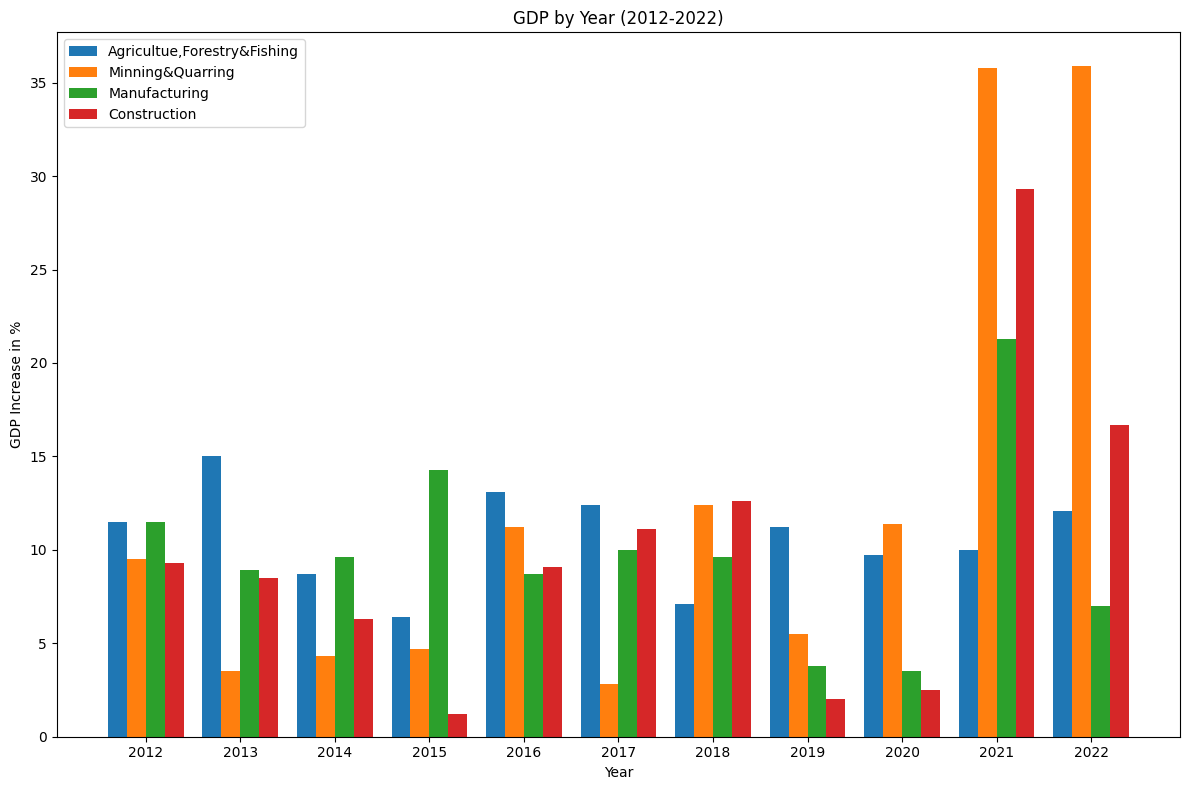

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
data = pd.read_csv("ML_gdp.csv")

# Select data from 2012 to 2022
data_plot = data.loc[(data['Year'] >= 2012) & (data['Year'] <= 2022)]

# Get the years and columns
years = data_plot['Year']
columns = data_plot.columns[1:]

# Plot a grouped bar graph
plt.figure(figsize=(12, 8))
bar_width = 0.2
index = np.arange(len(years))

for i, column in enumerate(columns):
    plt.bar(index + i * bar_width, data_plot[column], bar_width, label=column)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('GDP Increase in %')
plt.title('GDP by Year (2012-2022)')
plt.xticks(index + bar_width * 1.5, years)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


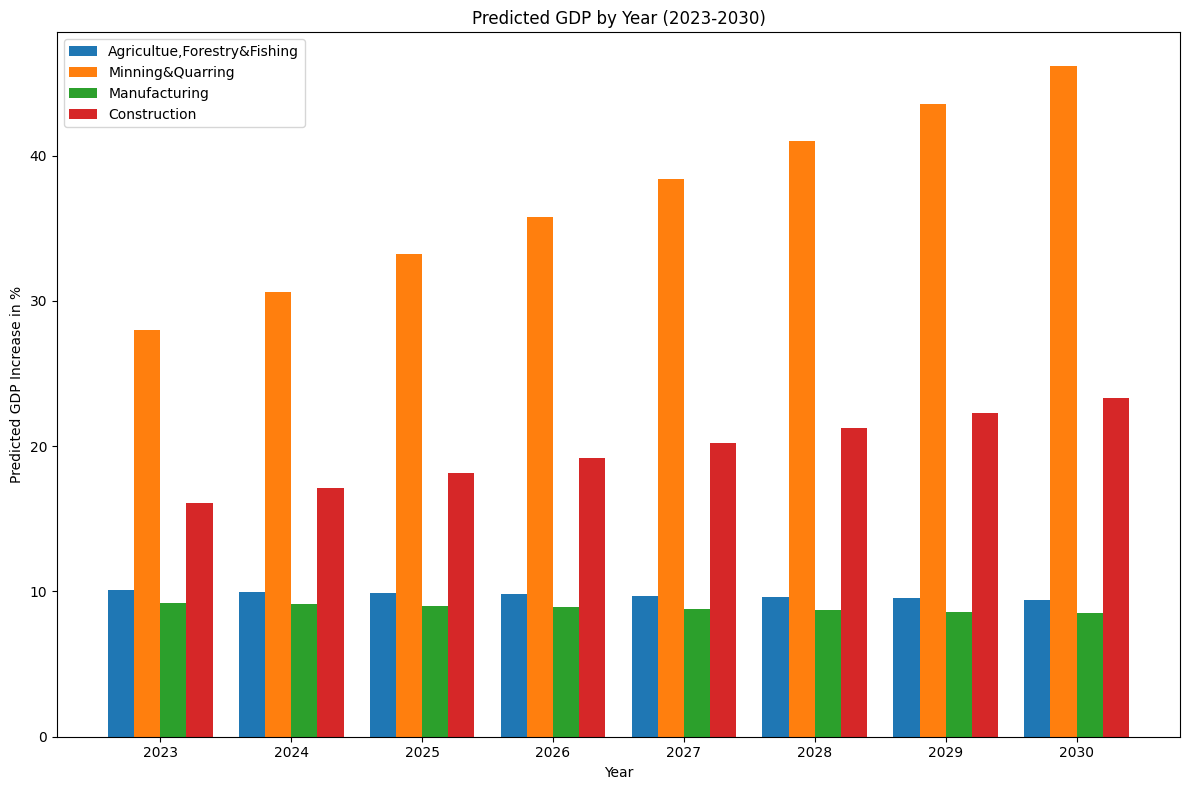

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
data = pd.read_csv("ML_gdp.csv")

# Select data from 2012 to 2030 for training
data_train = data.loc[(data['Year'] >= 2012) & (data['Year'] <= 2030)]

# Dictionary to store predicted values for each column
predicted_values = {}

# Iterate over each column (excluding 'Year')
for column in data_train.columns[1:]:
    X_train = data_train[['Year']].values
    y_train = data_train[column].values
    
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict values for the years 2023 to 2030
    X_future = np.array([[year] for year in range(2023, 2031)])
    y_pred_future = model.predict(X_future)
    
    # Store the predicted values in the dictionary
    predicted_values[column] = y_pred_future

# Plot a grouped bar graph for the predicted values
plt.figure(figsize=(12, 8))
bar_width = 0.2
index = np.arange(2023, 2031)

for i, column in enumerate(predicted_values.keys()):
    plt.bar(index + i * bar_width, predicted_values[column], bar_width, label=column)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Predicted GDP Increase in %')
plt.title('Predicted GDP by Year (2023-2030)')
plt.xticks(index + bar_width * (len(predicted_values) - 1) / 2, index)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()